# Combining Data With Pandas 

answer some questions 
- did the world happiness increase or decrease from 2015 to 2017

In [1]:
# import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


# read the datasets
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

# adding new column for each dataset to distiguish between them 
happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017



**combining dataframes using `concat()` function**

In [2]:
# combining header of 2015 and 2016 happiness reports
# the dataframes with the same shape 
head_2015 = happiness2015[["Country" , "Happiness Score" , "Year"]].head(3)
head_2016 = happiness2016[["Country" , "Happiness Score" , "Year"]].head(3)

# combine the headers together 
concat_axis0 = pd.concat([head_2015 , head_2016] , axis = 0)
question0 = concat_axis0.shape[0]

# combine and change axis 
concat_axis1 = pd.concat([head_2015 , head_2016] , axis = 1)
question2 = concat_axis1.shape[1]

In [3]:
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [4]:
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


In [5]:
# lets start see concatinating with different shapes 

head_2015 = happiness2015[["Year" , "Country" , "Happiness Score" , "Standard Error"]].head(7)
head_2015 = happiness2015[["Country" , "Happiness Score" , "Year"]].head(5)

# axis = 0
concat_axis0 = pd.concat([head_2015 , head_2016])
concat_axis1 = pd.concat([head_2015 , head_2016] , axis = 1)

rows = concat_axis0.shape[0]
columns = concat_axis1.shape[1]

# show the result 
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [6]:
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016.0
1,Iceland,7.561,2015,Switzerland,7.509,2016.0
2,Denmark,7.527,2015,Iceland,7.501,2016.0
3,Norway,7.522,2015,NaN,NaN,NaN
4,Canada,7.427,2015,NaN,NaN,NaN


In [7]:
# ignore the original index and reset the index
update_index = pd.concat([head_2015 , head_2016] , ignore_index= True )

update_index

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
5,Denmark,7.526,2016
6,Switzerland,7.509,2016
7,Iceland,7.501,2016


**joining dataframes with `pd.merge()` function**
`merge()` combines dataframes horizentally (axis = 1) and only combines 2 dataframes at a time 

- merge dataframes on a **key** shared index or column 
- think of a **key** as creating a link from one dataframe to another and it is good practice to use keys with unique values to avoid duplicate data 

In [8]:
# exploring the function with 3 rows from each dataframe 
h_2015 = happiness2015[["Country" , "Happiness Rank" , "Year"]].iloc[2:5]
h_2016 = happiness2016[["Country" , "Happiness Rank" , "Year"]].iloc[2:5]

h_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [9]:
h_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [10]:
# joining data 
merged = pd.merge(left = h_2015  , right = h_2016 , on = "Country")
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


- why only orway comes here as a rresult of joining dataframes ? 

because this is the **Inner** join type 

1. **Inner** includes common elements between dataframes 
2. **Outer** icludes all data from both dataframes 
3. **Left** includes all the rows from left one with the common from the right one 
4. **Right** includes all the data from the right with the common from left one 

In [11]:
head_2015 = happiness2015[["Country" , "Happiness Rank" , "Year"]].head(6)
head_2016 = happiness2016[["Country" , "Happiness Rank" , "Year"]].head(7)

pd.concat([head_2015 , head_2016] , ignore_index = True)

,Country,Happiness Rank,Year
0,Switzerland,1,2015
1,Iceland,2,2015
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015
6,Denmark,1,2016
7,Switzerland,2,2016
8,Iceland,3,2016
9,Norway,4,2016


In [12]:
# inner join for dataframes 
inner = pd.merge(left = head_2015 , right = head_2016 , on = "Country" )
inner

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Switzerland,1,2015,2,2016
1,Iceland,2,2015,3,2016
2,Denmark,3,2015,1,2016
3,Norway,4,2015,4,2016
4,Canada,5,2015,6,2016
5,Finland,6,2015,5,2016


In [13]:
# outer join 
outer = pd.merge(left = head_2015, right = head_2016 , on = "Country" , how = "outer")
outer

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Switzerland,1.0,2015.0,2,2016
1,Iceland,2.0,2015.0,3,2016
2,Denmark,3.0,2015.0,1,2016
3,Norway,4.0,2015.0,4,2016
4,Canada,5.0,2015.0,6,2016
5,Finland,6.0,2015.0,5,2016
6,Netherlands,NaN,NaN,7,2016


In [14]:
# left join
pd.merge(left = head_2015 , right = head_2016 , on = "Country" , how = "left")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Switzerland,1,2015,2,2016
1,Iceland,2,2015,3,2016
2,Denmark,3,2015,1,2016
3,Norway,4,2015,4,2016
4,Canada,5,2015,6,2016
5,Finland,6,2015,5,2016


In [15]:
# right join 
pd.merge(left = head_2015 , right = head_2016 , on = "Country" , how = "right")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3.0,2015.0,1,2016
1,Switzerland,1.0,2015.0,2,2016
2,Iceland,2.0,2015.0,3,2016
3,Norway,4.0,2015.0,4,2016
4,Finland,6.0,2015.0,5,2016
5,Canada,5.0,2015.0,6,2016
6,Netherlands,NaN,NaN,7,2016


In [16]:
# pd.merge(left = , right = , how = , on = )

In [17]:
# set the suffix (_x , _y) in merge function 

merge = pd.merge(left = head_2015 , right = head_2016, how = "left" , on = "Country" , suffixes= ("_2015" , "_2016"))
merge

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Switzerland,1,2015,2,2016
1,Iceland,2,2015,3,2016
2,Denmark,3,2015,1,2016
3,Norway,4,2015,4,2016
4,Canada,5,2015,6,2016
5,Finland,6,2015,5,2016


In [18]:
merge2 = pd.merge(left = head_2016 , right = head_2015 , on = "Country" , how = "left" , suffixes= ("_2016" , "_2015"))
merge2

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Denmark,1,2016,3.0,2015.0
1,Switzerland,2,2016,1.0,2015.0
2,Iceland,3,2016,2.0,2015.0
3,Norway,4,2016,4.0,2015.0
4,Finland,5,2016,6.0,2015.0
5,Canada,6,2016,5.0,2015.0
6,Netherlands,7,2016,NaN,NaN


**join 2 dataframes with the index**

the result contains only the values in the key that appears in both dataframes

- **only the common Indexes (00,11, 22, ..44)**

In [19]:
four_2015 = happiness2015[["Country" , "Happiness Score" , "Year"]].iloc[2:6]
three_2016 = happiness2016[["Country" , "Happiness Score" , "Year"]].iloc[2:5]

# let's check the index joining 
pd.merge(left = four_2015, right= three_2016, how = "inner", left_index=True, right_index=True) # no (on = "")

,Country_x,Happiness Score_x,Year_x,Country_y,Happiness Score_y,Year_y
2,Denmark,7.527,2015,Iceland,7.501,2016
3,Norway,7.522,2015,Norway,7.498,2016
4,Canada,7.427,2015,Finland,7.413,2016


In [33]:
# combine all indexes 
pd.merge(left = four_2015, right= three_2016, how = "outer", left_index=True, right_index=True )

,Country_x,Happiness Score_x,Year_x,Country_y,Happiness Score_y,Year_y
2,Denmark,7.527,2015,Iceland,7.501,2016.0
3,Norway,7.522,2015,Norway,7.498,2016.0
4,Canada,7.427,2015,Finland,7.413,2016.0
5,Finland,7.406,2015,NaN,NaN,NaN


In [20]:
pd.merge(left = three_2016, right = four_2015, how = "inner", left_index=True, right_index=True)

,Country_x,Happiness Score_x,Year_x,Country_y,Happiness Score_y,Year_y
2,Iceland,7.501,2016,Denmark,7.527,2015
3,Norway,7.498,2016,Norway,7.522,2015
4,Finland,7.413,2016,Canada,7.427,2015


In [21]:
four_2015

,Country,Happiness Score,Year
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Canada,7.427,2015
5,Finland,7.406,2015


In [22]:
three_2016

,Country,Happiness Score,Year
2,Iceland,7.501,2016
3,Norway,7.498,2016
4,Finland,7.413,2016


when to use `concat() or merge()` this depends on the problem it self 
- but we have a question now **Did the world happiness increase or decease or stay the same from 2015 to 2017 ?** 
- try to use the previous knowledge
- to answer this question we need to create bar plot where each bar represent the **mean happiness** for one of the years 2015, 2016, 2017 

as what we are gonn do now for happiness report 2015

In [23]:
means = happiness2015.groupby("Region").mean()
happiness_score_mean = means["Happiness Score"]
happiness_score_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

<AxesSubplot:title={'center':'mean happiness for each region'}, ylabel='Region'>

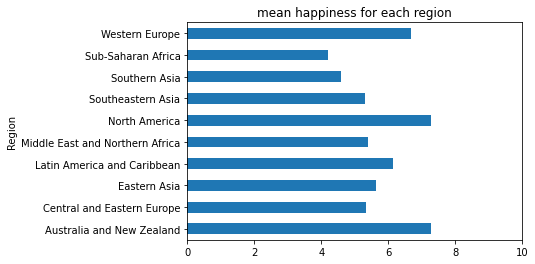

In [24]:
# plotting the score 
happiness_score_mean.plot(kind = "barh" , title = "mean happiness for each region" , xlim = (0,10))

we need to do the same process for all years now 
1. combine the datasets together 2015, 2016, 2017
2. group it by the `Year` column


In [25]:
# read 2017 happiness report 
happiness_2017 = pd.read_csv("World_Happiness_2017.csv")
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [26]:
# change the Happiness.Score column name to match the other dataframes
happiness_2017.rename({"Happiness.Score" : "Happiness Score"} , inplace = True , axis = 1)

In [27]:
# add the Year column
happiness_2017["Year"] = 2017
happiness_2017.head()

,Country,Happiness.Rank,Happiness Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [28]:
# get the data that you want 
# combine the data 
combined = pd.concat([happiness2015, happiness2016, happiness_2017] )
combined

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.349510,0.94143,0.665570,0.41978,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.402230,0.94784,0.628770,0.14145,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.360580,0.87464,0.649380,0.48357,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.330950,0.88521,0.669730,0.36503,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.322610,0.90563,0.632970,0.32957,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,NaN,NaN,3.471,NaN,NaN,0.945707,NaN,0.581844,NaN,...,2017,NaN,NaN,151.0,3.543030,3.398970,0.368746,0.326425,0.455220,0.540061
151,Syria,NaN,NaN,3.462,NaN,NaN,0.396103,NaN,0.081539,NaN,...,2017,NaN,NaN,152.0,3.663669,3.260331,0.777153,0.500533,0.151347,1.061574
152,Tanzania,NaN,NaN,3.349,NaN,NaN,1.041990,NaN,0.390018,NaN,...,2017,NaN,NaN,153.0,3.461430,3.236570,0.511136,0.364509,0.066035,0.621130
153,Burundi,NaN,NaN,2.905,NaN,NaN,0.629794,NaN,0.059901,NaN,...,2017,NaN,NaN,154.0,3.074690,2.735310,0.091623,0.151611,0.084148,1.683024


<AxesSubplot:title={'center':'average happiness score 2015 to 2017'}, ylabel='Year'>

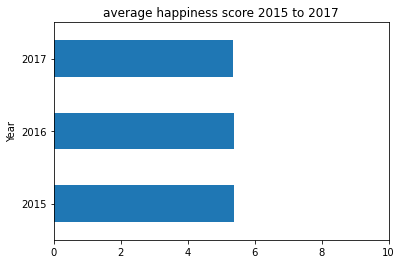

In [29]:
# grouping data for happiness score 
grouped = combined.groupby("Year")
means = grouped["Happiness Score"].mean()
means.plot(kind = "barh", xlim = (0,10), title = "average happiness score 2015 to 2017")


,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


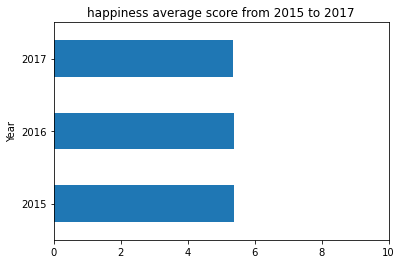

In [30]:
# what about making a pivot table 
pivot_table_combined = combined.pivot_table(values = "Happiness Score" , index = "Year", aggfunc= "mean")
pivot_table_combined.plot(kind = "barh" , title = "happiness average score from 2015 to 2017", legend = False, xlim=(0,10))
pivot_table_combined

**Concolusion**
the world happiness stay the same from 2015 to 2017

- search for `df.append() , df.join()` shortcuts for `concat(), merge()`
